In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [14]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [15]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))#把之前的relu改为了selu
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [16]:
help(keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (ther

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

In [18]:
len(model.layers)

22

In [19]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
#     keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=40,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6804 - accuracy: 0.7616 - val_loss: 0.5124 - val_accuracy: 0.8174
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4841 - accuracy: 0.8261 - val_loss: 0.4473 - val_accuracy: 0.8436
Epoch 3/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4315 - accuracy: 0.8448 - val_loss: 0.4170 - val_accuracy: 0.8524
Epoch 4/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3997 - accuracy: 0.8547 - val_loss: 0.4004 - val_accuracy: 0.8568
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3753 - accuracy: 0.8640 - val_loss: 0.3926 - val_accuracy: 0.8606
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3569 - accuracy: 0.8704 - val_loss: 0.3823 - val_accuracy: 0.8668
Epoch 7/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3424 - accuracy: 0.8749 - val_loss: 0.3711 - val_accuracy:

In [20]:
print(history.history)

{'loss': [0.680365264415741, 0.48414552211761475, 0.4315465986728668, 0.3996504247188568, 0.375285267829895, 0.3569100797176361, 0.3424176573753357, 0.3285876512527466, 0.31726887822151184, 0.3077068626880646, 0.29809874296188354, 0.2894829213619232, 0.2817608118057251, 0.27404096722602844, 0.26707637310028076, 0.26119744777679443, 0.25491318106651306, 0.24864047765731812, 0.24268488585948944, 0.23790688812732697, 0.23308266699314117, 0.22759830951690674, 0.22327736020088196, 0.2188166230916977, 0.2139388620853424, 0.2102198749780655, 0.20512734353542328, 0.20007869601249695, 0.19619598984718323, 0.1926836222410202, 0.18979424238204956, 0.18538396060466766, 0.18085086345672607, 0.17843936383724213, 0.17337971925735474, 0.17059756815433502, 0.1669318675994873, 0.16255304217338562, 0.15976877510547638, 0.1579391211271286], 'accuracy': [0.7616181969642639, 0.8261454701423645, 0.8448363542556763, 0.8547454476356506, 0.8639818429946899, 0.8703818321228027, 0.874854564666748, 0.8803818225860

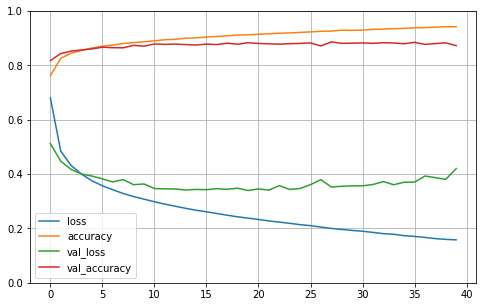

In [21]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))
#    selu缓解梯度消失

In [22]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.45828551054000854, 0.8675000071525574]